<a href="https://colab.research.google.com/github/imp-etus/Seattle-Weather/blob/main/Evelyn_McCarty_DATA_3320_Seattle_St_Louis_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Provide a brief introduction to the purpose of this notebook.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

years = {2018, 2019, 2020, 2021, 2022}

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [ ]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

Load the St. Louis data set

In [ ]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Explore the contents of the data sets

In [ ]:
df_seattle.columns
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [ ]:
df_stlouis.info()
df_stlouis.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

In [ ]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [ ]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

## Convert data types, if necessary

In [ ]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [ ]:
# testing
df_seattle['PRCP'].head()
#df_stlouis['PRCP'].head()

0    0.00
1    0.00
2    0.00
3    0.00
4    0.25
Name: PRCP, dtype: float64

## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

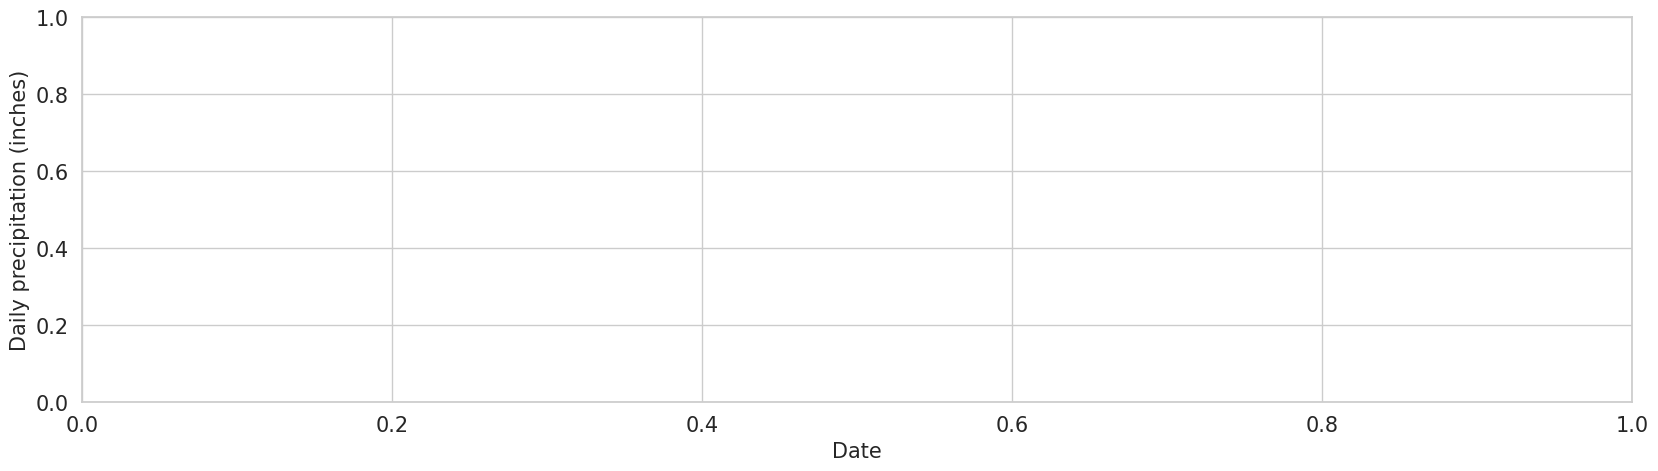

In [ ]:
plt.figure(figsize = (20,5))
#sns.lineplot(data=df_seattle, x='DATE', y='PRCP')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)
plt.tick_params(labelsize=15)



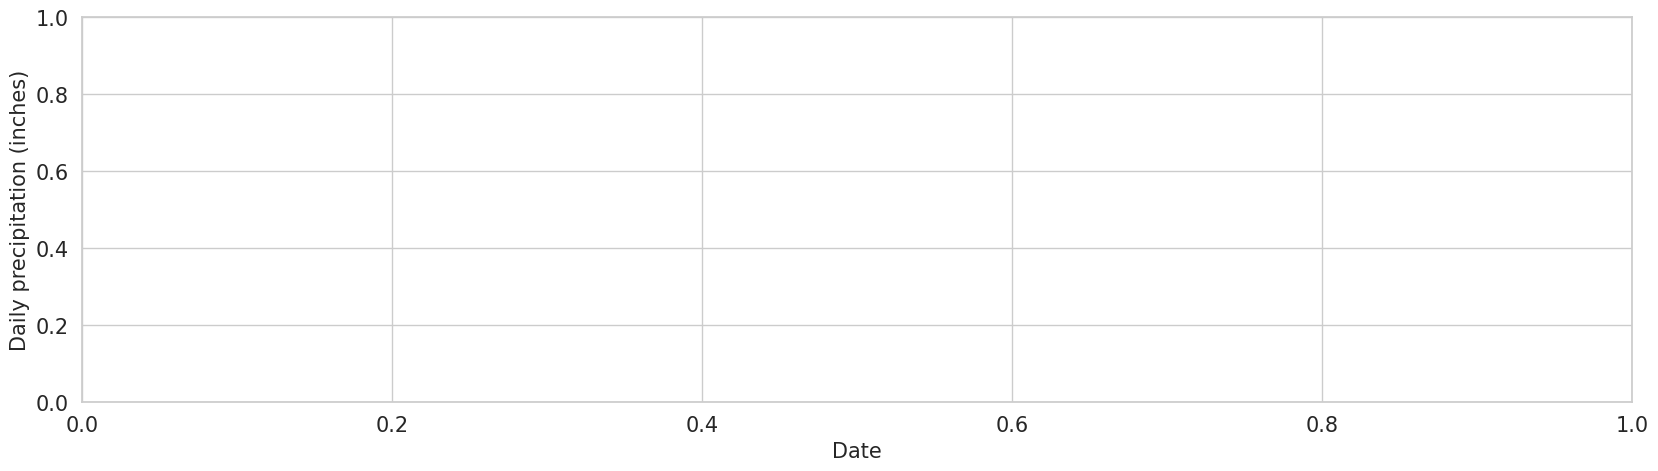

In [ ]:
plt.figure(figsize = (20,5))
#sns.lineplot(data=df_stlouis, x='DATE', y='PRCP')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)
plt.tick_params(labelsize=15)

## Select relevant subsets of the data

In [ ]:
df_stl_cropped = df_stlouis[df_stlouis.STATION == 'USW00013994']

## Identify and deal with missing values


## Join data frames keeping `DATE` and `PRCP` columns

In [170]:
df = df_seattle[['DATE', 'PRCP']].merge(df_stl_cropped[['DATE', 'PRCP']], on = 'DATE', how = 'right')
#df_merged

## Create a tidy data frame with columns for city and precipitation

In [171]:
df_tidy = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')


### Rename columns or values to follow best practices

In [172]:
df_tidy.loc[df_tidy['CITY'] == 'PRCP_x', 'CITY'] = 'SEA'
df_tidy.loc[df_tidy['CITY'] == 'PRCP_y', 'CITY'] = 'STL'
df_tidy = df_tidy.rename(columns={"DATE":"day", "PRCP":"precipitation", "CITY":"city"})

## missing values

<Axes: >

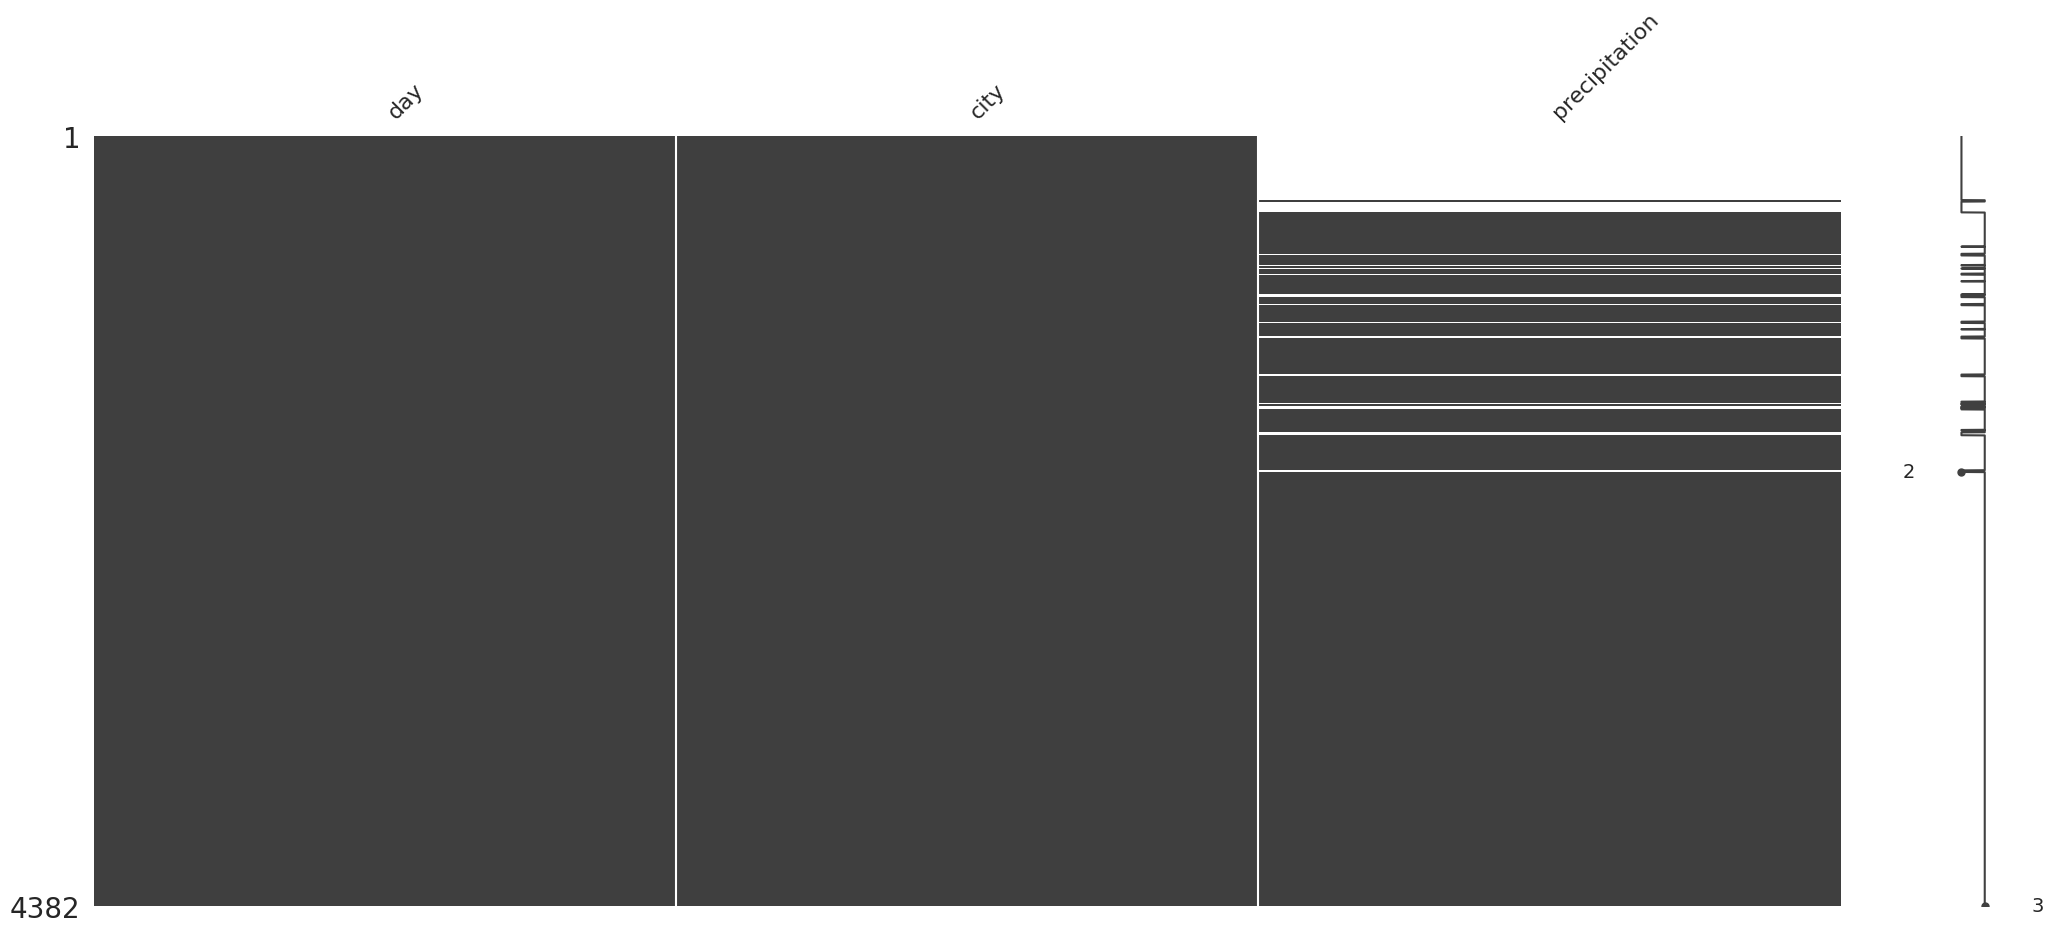

In [173]:
msno.matrix(df_tidy)

In [174]:
df_tidy['day_of_year'] = pd.DatetimeIndex(df_tidy['day']).day_of_year
indices = np.where(df_tidy['precipitation'].isna() == True)[0]
mean_replace = df_tidy.loc[df_tidy['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [175]:
for _, index in enumerate(indices):
  df_tidy.loc[index, 'precipitation'] = mean_replace.loc[df_tidy.loc[index, 'day_of_year']].values[0]

In [176]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   day            4382 non-null   datetime64[ns]
 1   city           4382 non-null   object        
 2   precipitation  4382 non-null   float64       
 3   day_of_year    4382 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 137.1+ KB


## Create relevant derived variables as new columns

does it rain more...

- peak value (by year?)
- more rain by # (table / straight number)
- month-to-month, year-over-year (bar)
- sustained rain? (count over a specific quantity)


In [177]:
max_overall = df_tidy['precipitation'].idxmax()
df_tidy.loc[max_overall]
df_tidy = df_tidy.drop(columns='day_of_year')

df_month_sums = df_tidy.groupby([(df_tidy.day.dt.year), (df_tidy.day.dt.month), (df_tidy.city)]).sum()
df_month_sums.index = df_month_sums.index.set_names(['year', 'month', 'city'])
df_month_sums = df_month_sums.reset_index()
#df_month_sums = df_month_sums.drop(columns='day_of_year')

df_year_sums = df_tidy.groupby([(df_tidy.day.dt.year), (df_tidy.city)]).sum()
df_year_sums = df_year_sums.reset_index()
#df_year_sums = df_year_sums.drop(columns='day_of_year')

df_just_months = df_tidy.groupby([(df_tidy.day.dt.month), (df_tidy.city)]).sum()
df_just_months.index = df_just_months.index.set_names(['month', 'city'])
df_just_months = df_just_months.reset_index()


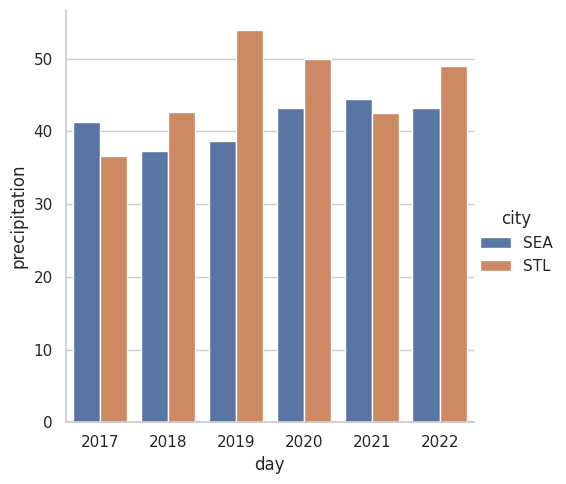

In [178]:
sns.catplot(kind='bar', data=df_year_sums, x='day', y='precipitation', hue='city')

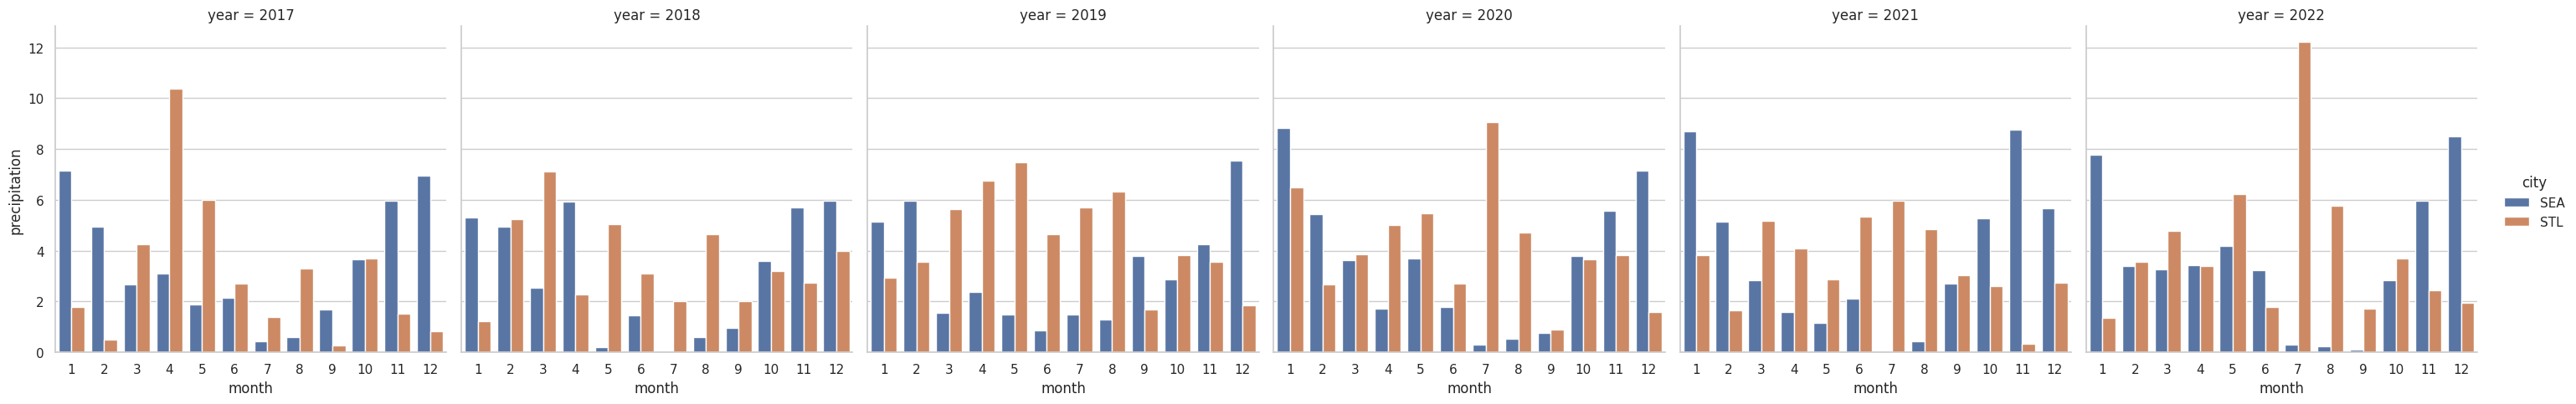

In [179]:
sns.catplot(kind='bar', data=df_month_sums, x='month', y='precipitation', hue='city', col='year')

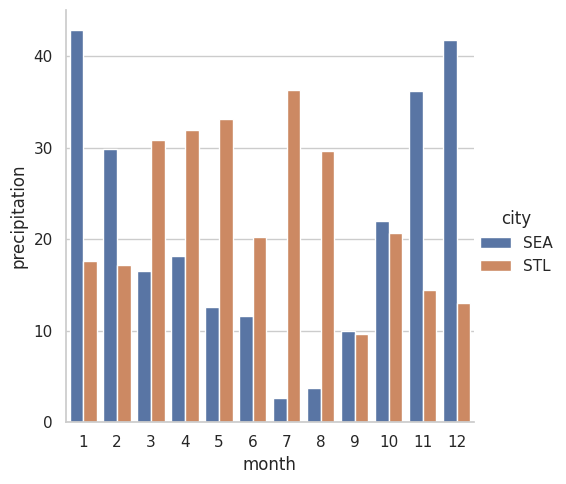

In [180]:
sns.catplot(kind='bar', data=df_just_months, x='month', y='precipitation', hue='city')

In [182]:
idx_max_monthly = df_tidy.groupby([df_tidy.day.dt.year, df_tidy.day.dt.month])['precipitation'].idxmax()

higher_in_sea = df_tidy.iloc[idx_max_monthly]['city'].value_counts()['SEA']
higher_in_stl = df_tidy.iloc[idx_max_monthly]['city'].value_counts()['STL']
(higher_in_sea, higher_in_stl)

(20, 52)

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. It is fine to return to modify this step after exploring the data further.

## Export the clean .csv file